#### Importing Libraries

We will be importing the following libraries for our subsequent data analysis. Pandas will be used to explore our datasets, and includes functions that analyse, manipulate and clean our dataframe. Numpy allows us to perform operations on arrays. Seaborn and Matplotlib gives us the tools for visualising our data. 

In [138]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
df95 = pd.read_csv("1995 copy.csv")
df96 = pd.read_csv("1996 copy.csv")
df97 = pd.read_csv("1997 copy.csv")
df98 = pd.read_csv("1998 copy.csv")
df99 = pd.read_csv("1999 copy.csv")
df00 = pd.read_csv("2000 copy.csv")
df01 = pd.read_csv("2001 copy.csv",encoding ='ISO-8859-1')
df02 = pd.read_csv("2002 copy.csv",encoding ='ISO-8859-1')
df03 = pd.read_csv("2003 copy.csv")
df04 = pd.read_csv("2004 copy.csv")
df05 = pd.read_csv("2005 copy.csv")

/var/folders/45/ldf1k87x277414bmf2l5slpr0000gn/T/ipykernel_76204/4093503801.py:9: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df03 = pd.read_csv("2003 copy.csv")


## Part 2 

## Section A : What are the best times and days of the week to minimise delays each year?

#### How can we define minimising delay?

We can begin our exploration by outlining what delay means in the context of our dataset. Due to number of years that we will be dealing with, we will be combining the ArrDelay and DepDelay into a new variable, TotalDelay. Using `min()` and `max()` methods, we are able to see the range of TotalDelay for our given dataset. Note that within ArrDelay and ArrDelay there are negative delays; indicative of a flight arriving or departing earlier than scheduled. Therefore we should remove these values as they will not be helpful in our exploration. We create a function `delayconverter` that converts negative delay values which indicate that the flight arrived/departed early into 0. This cleans our dataset by only showing "bad" delays instead of both "bad and "good" delays. 

Our pipeline for handling Delay values is as follows: 

    (1) Run negdelayconverter function to convert negative delay values to 0
    (2) Run totaldelayconverter function which sums up ArrDelay and DepDelay and returns a new column TotalDelay
    
This is in addition to our standard steps to select our variables, clean our data by removing any rows with `NaN` values and changing `float64` datatypes to `int64` for more efficient dataprocessing.

In [140]:
def negdelayconverter(df, column1, column2):
    df[column1] = np.maximum(df[column1], 0)
    df[column2] = np.maximum(df[column2], 0)
    

In [141]:
def totaldelayconverter(df):
    delay_values = df['ArrDelay'] + df['DepDelay']
    df['TotalDelay'] = delay_values 
    

#### variable selection

Before any analysis can be done, ideally we would like to filter out variables from our dataframe. This is done in order to reduce computational load on our devices, while at the same time showcasing our insights more effectively. 
Our chosen variables will include: `DepDelay`,`ArrDelay`,`DepTime`,`CRSDepTime` and created variable `TotalDelay`. To reduce redundancy of data, we will focus our efforts on flights leaving their respective airports and as such we will not be including `ArrTime` nor looking at flight information for planes arriving at their destination.

On `Cancelled` and `Diverted` variables, upon further inspection, we see that the percentage of cancelled flights (2%) as well as diverted flights (0.2%) is extremely small compared to total flights and as a result we will not be factoring those types of flights into our analysis. 

For each year's dataset, this will be a breakdown as to what we will be looking to do to the data:

Firstly we will be ***preprocessing*** - selecting our variables, handling `NaN` values, delay values. 

Then we will move on the ***analysis*** step - creating bins for the 2-hour time intervals we will be using and grouping the departure times into a new column. This is so we are able to visualise percentage of flights departing per time interval and subsequently the average time delay for flights in said time intervals. 

Finally, we then move on the ***conclusion*** step, where we derive insights from our visualisation. 

### Year 1995 

***preprocessing***

In [142]:
df1995 = df95.loc[:,['DepTime','CRSDepTime','DepDelay','ArrDelay']]

df1995.isnull().sum()
df1995.dropna(inplace=True)

df1995['DepTime'] = df1995['DepTime'].astype(int)

negdelayconverter(df1995, 'ArrDelay','DepDelay')

totaldelayconverter(df1995)

***analysis***

we create a function that creates the time intervals for our dataset in order to ease it's creation over our next 10 datasets.

In [143]:
def interval_creator(df, time_column='DepTime', bins=bins, labels=labels):
    df['TimeInterval'] = pd.cut(df[time_column], bins=bins, labels=labels, include_lowest=True)
    
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400]
labels = ['0000-0200', '0200-0400', '0400-0600', '0600-0800', '0800-1000', '1000-1200',
          '1200-1400', '1400-1600', '1600-1800', '1800-2000', '2000-2200', '2200-2400']

interval_creator(df1995)

In [144]:
mean_delay = df1995.groupby('TimeInterval')['TotalDelay'].mean().reset_index()

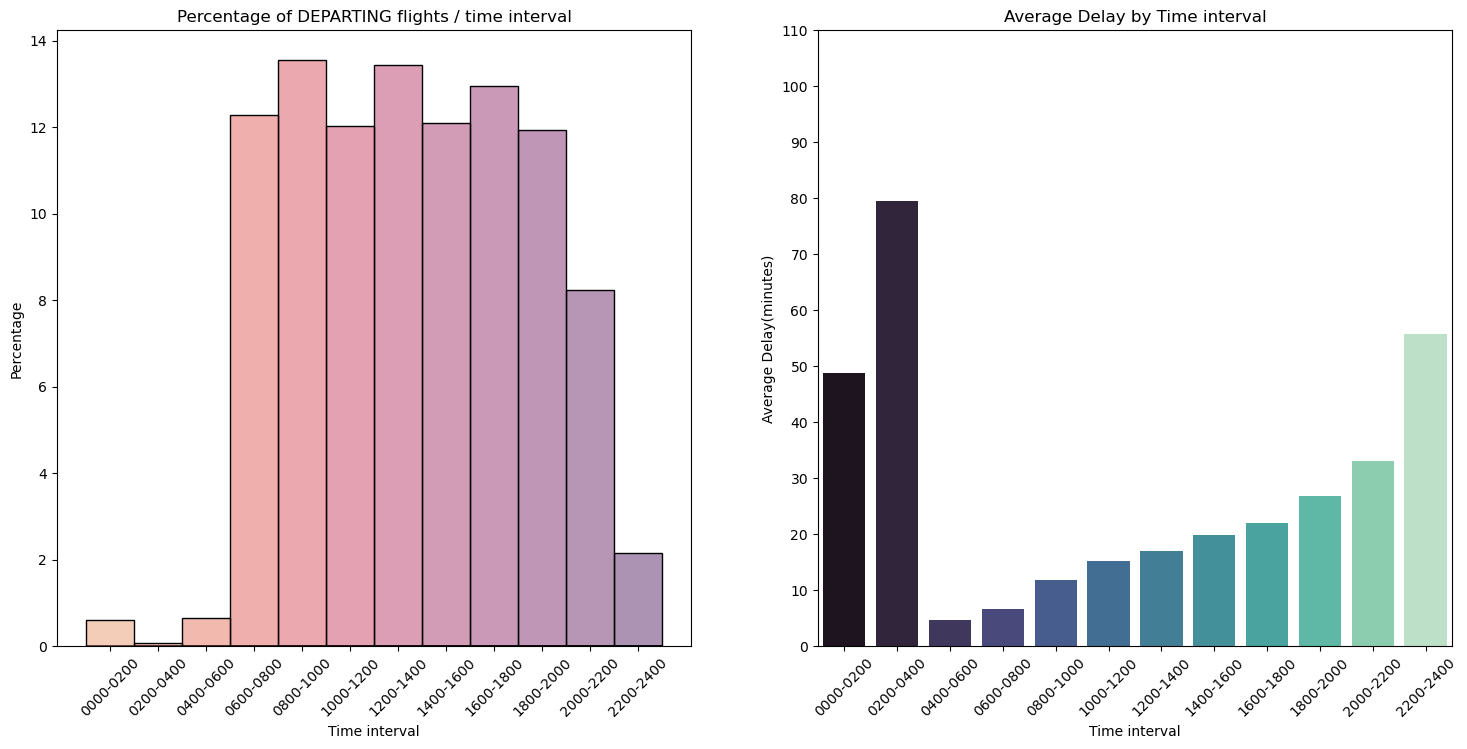

In [145]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.histplot(df1995, x='TimeInterval', stat='percent', legend=False, discrete=True, ax=ax[0], hue='TimeInterval', palette='flare')
ax[0].set_title('Percentage of DEPARTING flights / time interval')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xlabel('Time interval', rotation=0)
ax[0].set_ylabel('Percentage')

sns.barplot(mean_delay, x='TimeInterval', y='TotalDelay', palette='mako', errorbar = None, ax=ax[1])
ax[1].set_title('Average Delay by Time interval')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_yticks(range(0,120,10))
ax[1].set_xlabel('Time interval', rotation=0)
ax[1].set_ylabel('Average Delay(minutes)')

plt.show()

***conclusion***

In [146]:
mean_delay.sort_values(by=['TotalDelay'], ascending=True, inplace=True)
mean_delay.head(3)

,TimeInterval,TotalDelay
2,0400-0600,4.725880
3,0600-0800,6.665648
4,0800-1000,11.865781


Therefore, we can see here that optimal time in the year 1995 to fly would be between 0400 - 0600 in the morning.

### Year 1996

***preprocessing***

In [147]:
df1996 = df96.loc[:,['DepTime','CRSDepTime','DepDelay','ArrDelay']]

df1996.isnull().sum()
df1996.dropna(inplace=True)

df1996['DepTime'] = df1996['DepTime'].astype(int)

negdelayconverter(df1996, 'ArrDelay','DepDelay')

totaldelayconverter(df1996)

***analysis***

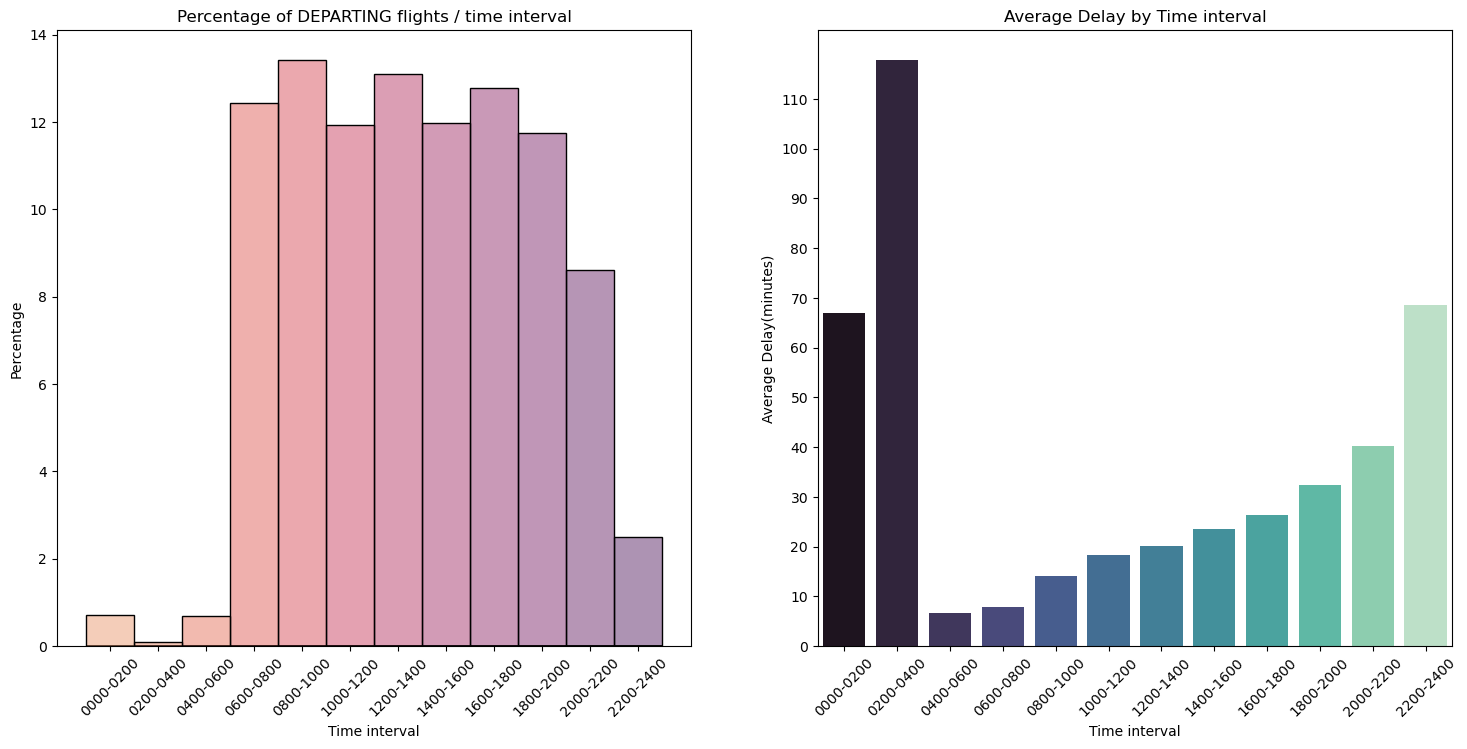

In [148]:
interval_creator(df1996)
mean_delay = df1996.groupby('TimeInterval')['TotalDelay'].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.histplot(df1996, x='TimeInterval', stat='percent', legend=False, discrete=True, ax=ax[0], hue='TimeInterval', palette='flare')
ax[0].set_title('Percentage of DEPARTING flights / time interval')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xlabel('Time interval', rotation=0)
ax[0].set_ylabel('Percentage')

sns.barplot(mean_delay, x='TimeInterval', y='TotalDelay', palette='mako', errorbar = None, ax=ax[1])
ax[1].set_title('Average Delay by Time interval')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_yticks(range(0,120,10))
ax[1].set_xlabel('Time interval', rotation=0)
ax[1].set_ylabel('Average Delay(minutes)')

plt.show()

***conclusion***

In [149]:
mean_delay.sort_values(by=['TotalDelay'], ascending=True, inplace=True)
mean_delay.head(3)

,TimeInterval,TotalDelay
2,0400-0600,6.626509
3,0600-0800,7.830542
4,0800-1000,14.062209


Therefore, we can see here that optimal time in the year 1996 to fly would be between 0400 - 0600 in the morning.

### Year 1997

***preprocessing***

In [150]:
df1997 = df97.loc[:,['DepTime','CRSDepTime','DepDelay','ArrDelay']]

df1997.isnull().sum()
df1997.dropna(inplace=True)

df1996['DepTime'] = df1997['DepTime'].astype(int)

negdelayconverter(df1997, 'ArrDelay','DepDelay')

totaldelayconverter(df1997)

***analysis***

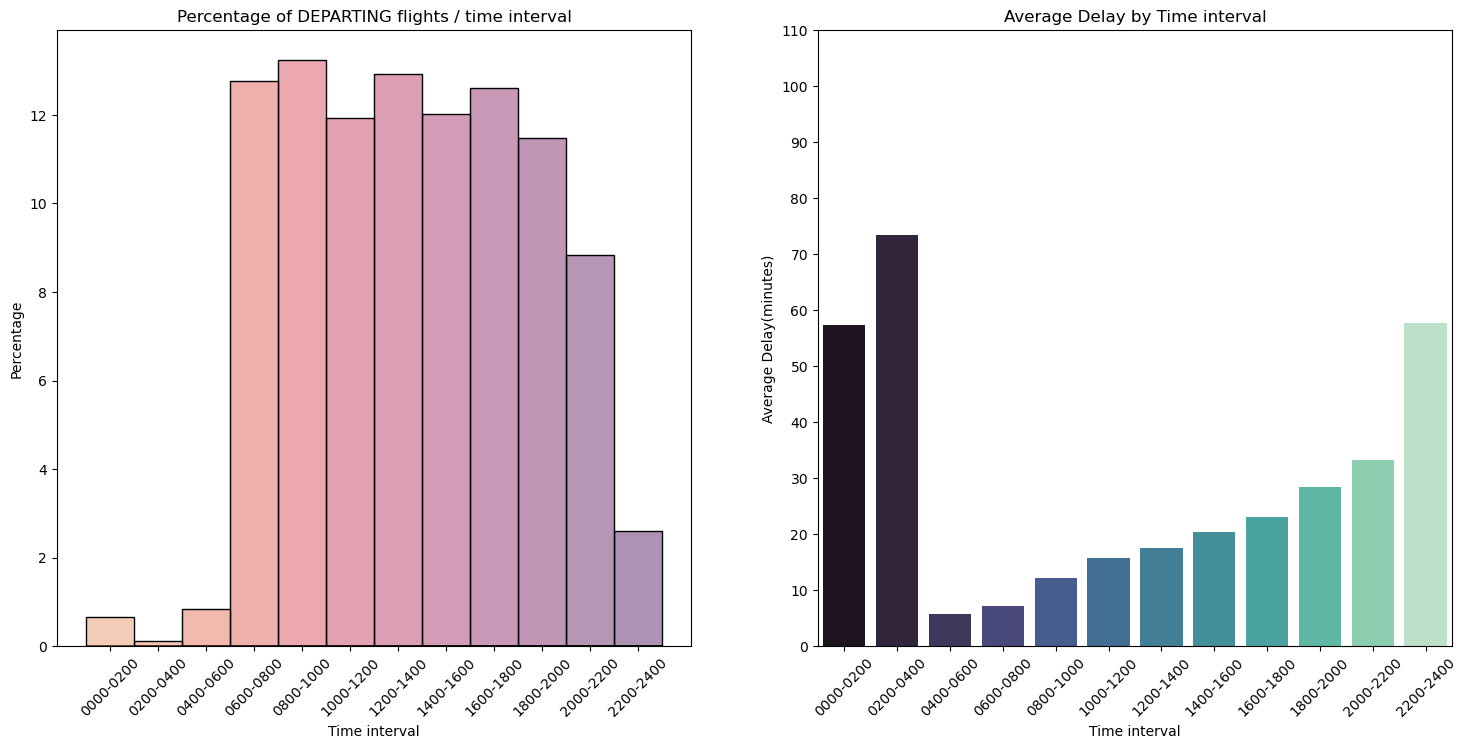

In [151]:
interval_creator(df1997)
mean_delay = df1997.groupby('TimeInterval')['TotalDelay'].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.histplot(df1997, x='TimeInterval', stat='percent', legend=False, discrete=True, ax=ax[0], hue='TimeInterval', palette='flare')
ax[0].set_title('Percentage of DEPARTING flights / time interval')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xlabel('Time interval', rotation=0)
ax[0].set_ylabel('Percentage')

sns.barplot(mean_delay, x='TimeInterval', y='TotalDelay', palette='mako', errorbar = None, ax=ax[1])
ax[1].set_title('Average Delay by Time interval')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_yticks(range(0,120,10))
ax[1].set_xlabel('Time interval', rotation=0)
ax[1].set_ylabel('Average Delay(minutes)')

plt.show()

***conclusion***

In [152]:
mean_delay.sort_values(by=['TotalDelay'], ascending=True, inplace=True)
mean_delay.head(3)

,TimeInterval,TotalDelay
2,0400-0600,5.806447
3,0600-0800,7.172997
4,0800-1000,12.178772
